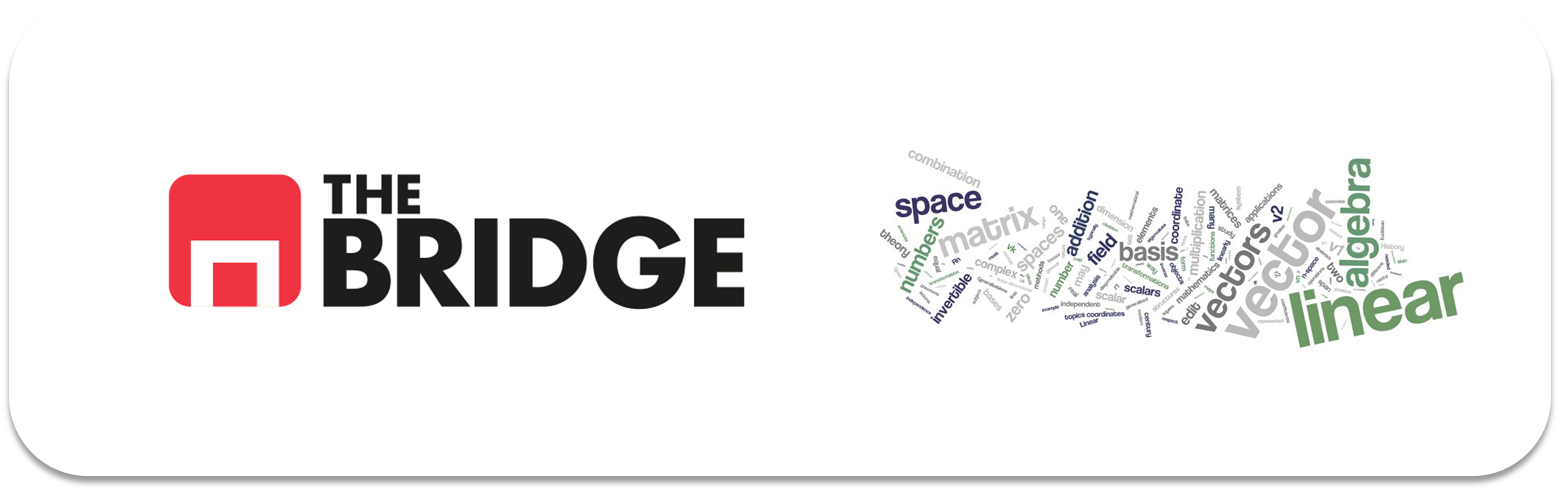

<center>
<center/>

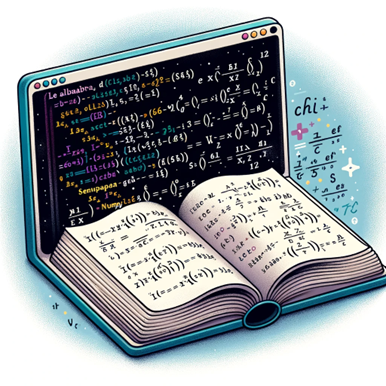


## PRACTICA OBLIGATORIA: ALGEBRA Y NUMPY

* La práctica obligatoria de esta unidad consiste en dos ejercicios de programación libre a completar. Descarga este notebook en tu ordenador y trabaja en local.  
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

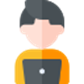

## PARTE I: ¿Dónde me pongo como el Kiko?

<img src ='https://estaticos-cdn.prensaiberica.es/clip/23bf0054-14a8-40d0-8700-dc653638d702_16-9-discover-aspect-ratio_default_0.jpg' width=300>

Rafa, Nacho y Clara quieren comprar palmeras, donuts, hojaldres y tartas. Cada uno necesita diferentes cantidades y pueden elegir dos tiendas: *Manolo Bakes* y *Starbucks*. 

Las siguiente tablas muestran, respectivamente, la cantidad que cada uno necesita, y los precios en cada una de las tiendas

<table><thead><tr><th></th><th>Palmeras</th><th>Donuts</th><th>Hojaldres</th><th>Tartas</th></tr></thead><tbody><tr><td>Rafa</td><td>6</td><td>5</td><td>3</td><td>1</td></tr><tr><td>Nacho</td><td>3</td><td>6</td><td>2</td><td>2</td></tr><tr><td>Clara</td><td>3</td><td>4</td><td>3</td><td>1</td></tr></tbody></table>

<table><thead><tr><th></th><th>Manolo Bakes</th><th>Starbucks</th></tr></thead><tbody><tr><td>Palmera</td><td>1.50</td><td>1.00</td></tr><tr><td>Donut</td><td>2.00</td><td>2.50</td></tr><tr><td>Hojaldre</td><td>5.00</td><td>4.50</td></tr><tr><td>Tarta</td><td>16.00</td><td>17.00</td></tr></tbody></table>

Por ejemplo, si Rafa compra en *Manolo Bakes* gastaría:  

$6\cdot1.50+5\cdot2+3\cdot5+1\cdot16=50$  

y si compra en *Starbucks* gastaría:  

$6\cdot1+5\cdot2.50+3\cdot4.50+1\cdot17=49$  

**SE PIDE**: Genera la matriz que exprese la cantidad que cada persona gastaría en cada tienda, y recomienda a cada uno dónde debería hacer sus compras (pista: donde le cueste menos, ¿no?)

**REQUISITIO**: Emplea Numpy, su tipo array y sus operaciones para la resolución del ejercicio. 

In [1]:
import numpy as np
cantidad_necesaria = np.array([[6,5,3,1],[3,6,2,2],[3,4,3,1]]) # Matriz de bollos
precios_starbuck = np.array([1,2,4.5,17])
precios_manolo = np.array([1.5,2,5,16])

precios_completo = np.array([precios_manolo, precios_starbuck]).T # Matriz de precios
print(cantidad_necesaria)
print(precios_completo)

costes = cantidad_necesaria.dot(precios_completo)

print(costes)

In [10]:
# Manualmente:
print("Rafa tiene que ir a Starbucks")
print("Nacho tiene que ir a Manolo Bakes")
print("Clara da igual, Clara es como es y puede ir donde le dé la gana")

Rafa tiene que ir a Starbucks
Nacho tiene que ir a Manolo Bakes
Clara da igual, Clara es como es y puede ir donde le dé la gana


In [11]:
tienda = ["ManoloBakes","Starbucks"]
compradores =["Rafa","Nacho","Clara"]
for indice, comprador in enumerate(compradores):
    if costes[indice][0] != costes[indice][1]: # costes[indice,0] != costes[indice,1]
        indice_tienda_recomendada = np.argmin(costes[indice])
        tienda_recomendada = tienda[indice_tienda_recomendada]
        print(f"Para {comprador} la tienda recomendada es {tienda_recomendada}")
    else:
        print(f"Para {comprador} da igual la tienda, en términos de costes")

Para Rafa la tienda recomendada es Starbucks
Para Nacho la tienda recomendada es Starbucks
Para Clara la tienda recomendada es Starbucks


**BONUS (Voluntario):**  
Expresa utilizando markdown y laTex las matrices y las operaciones que has realizado. Recuerda que para invocar LaTex denro de markdown se emplea $, y $$ si queremos que esté centrado. Y que [aquí](https://ashki23.github.io/markdown-latex.html#latex "Latex y Markdown") tienes muchos ejemplos de como trabajar con latex

$$\begin{bmatrix}6&5&3&1\\3&6&2&2\\3&4&3&1\end{bmatrix} \times \begin{bmatrix}1.5&1\\2&2.5\\5&4.5\\16&17\end{bmatrix} = \begin{bmatrix}50&49\\58.5&61\\43.5&43.5\end{bmatrix}$$ 

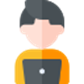

## PARTE II: Clasificador de Películas

II.1: Similitud entre películas

Vamos a calcular similitudes entre películas. Para ello las clasificasmos según generos, en concreto tenemos:

* Toy Story: Aventura, Animación, Comedia
* Jumanji: Aventura   
* Mortal Kombat: Acción, Aventura  
* Pocahontas: Animación, Romance

Y ahora calcularemos su similitud por el método del coseno. Para ello:

1. Convierte cada película en un vector y almacenalo en un diccionario con clave el nombre de la película. Pista: Para convertirlo en vector, crea un vector/lista por película con esta estructura (¿qué valores puedes darle por género?):

$$[Acción,  Aventura , Animación, Comedia, Romance]$$


In [12]:
peliculas = {
    "Toy Story": [0,1,1,1,0],
    "Jumanji": [0,1,0,0,0],
    "Mortal Kombat": [1,1,0,0,0],
    "Pocahontas": [0,0,1,0,1]
}



2. Crea una matriz de películas con un array de numpy. Muestra la dimension, shape, tamaño y tipo del array.


In [13]:
vectores = list(peliculas.values())
matriz_peliculas_np = np.array(vectores)
print(matriz_peliculas_np)

[[0 1 1 1 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 1]]



3. A partir de la similitud por coseno (recuerda a mayor coseno entre vectore más similitud), genera un programa que calcule la similitud entre cada pelicula y nos diga cuales son las más parecidas entre sí.


In [14]:
for pelicula1, vector in peliculas.items():
    coseno_maximo = -1
    for pelicula2, vector2 in peliculas.items():
        if pelicula1 != pelicula2:
            coseno = np.dot(vector, vector2)/(np.linalg.norm(vector)*np.linalg.norm(vector2))
            if coseno > coseno_maximo:
                pelicula_similar = pelicula2
                coseno_maximo = coseno
    print(f"Para {pelicula1} la más parecida es {pelicula_similar}, grado de confianza: {coseno_maximo}")

# Hablar aquí de la diferecia entre similitud por distancia y similitud por coseno

Para Toy Story la más parecida es Jumanji, grado de confianza: 0.5773502691896258
Para Jumanji la más parecida es Mortal Kombat, grado de confianza: 0.7071067811865475
Para Mortal Kombat la más parecida es Jumanji, grado de confianza: 0.7071067811865475
Para Pocahontas la más parecida es Toy Story, grado de confianza: 0.40824829046386296


**BONUS (Voluntario)**:

A Jaimolas le encanta la premoritoria pelicula Wall-E (Aventura, Comedia, Acción), ¿qué película de las anteriores le recomendaríamos?

In [15]:
peliculas["Wall-E"] = [0,1,0,1,1]
for pelicula1, vector in peliculas.items():
    coseno_maximo = -1
    for pelicula2, vector2 in peliculas.items():
        if pelicula1 != pelicula2:
            coseno = np.dot(vector, vector2)/(np.linalg.norm(vector)*np.linalg.norm(vector2))
            if coseno > coseno_maximo:
                pelicula_similar = pelicula2
                coseno_maximo = coseno
    print(f"Para {pelicula1} la más parecida es {pelicula_similar}, grado de confianza: {coseno_maximo}")

Para Toy Story la más parecida es Wall-E, grado de confianza: 0.6666666666666667
Para Jumanji la más parecida es Mortal Kombat, grado de confianza: 0.7071067811865475
Para Mortal Kombat la más parecida es Jumanji, grado de confianza: 0.7071067811865475
Para Pocahontas la más parecida es Toy Story, grado de confianza: 0.40824829046386296
Para Wall-E la más parecida es Toy Story, grado de confianza: 0.6666666666666667


#### Ejercicio Extra

Crea una función de multiplicación de matrices que tenga por argumento dos array de numpy, pero antes de multiplicarlas compruebe que se pueden multiplicar (es decir se cumple la condición de numero de columnas y filas). Si no se cumple debe devolver el mensaje "Error: no se pueden multiplicar"y devolver None, y si se cumple debe devolver el resultado de la multiplicación. La comprobación la puedes hacer utilizando el atributo shape de un array de numpy para saber cuantas filas (variable.shape[0]) y cuantas columnas tiene (variable.shape[1]) o bien puedes emplear un truco con try/except. (Este ejercicio lo veremos en la sesión en vivo)



In [16]:
def mat_mul(matriz1, matriz2):
    num_columas_matriz1 = matriz1.shape[1]
    num_filas_matriz2 = matriz2.shape[0]
    if num_columas_matriz1 == num_filas_matriz2:
        return matriz1.dot(matriz2)
    else:
        print("Error: No se pueden multiplicar")

In [18]:
A = np.random.randint(0,9,(2,3))
B = np.random.randint(0,9,(5,3))
print(A)
print()
print(B)

[[5 5 2]
 [7 2 0]]

[[2 0 1]
 [7 1 2]
 [3 3 3]
 [6 2 8]
 [1 3 4]]


In [19]:
mat_mul(A,B)

Error: No se pueden multiplicar


In [20]:
def mat_mul_alt(matriz1,matriz2):
    try:
        return matriz1.dot(matriz2)
    except:
        print("Error: No se pueden multiplicar")
    print("Introduce otras dos matrices")

In [21]:
mat_mul_alt(A,B)
    

Error: No se pueden multiplicar
Introduce otras dos matrices


In [24]:
mat_mul(A,B.T)

array([[12, 44, 36, 56, 28],
       [14, 51, 27, 46, 13]])